# Flights data analysis

## I. Data   
This dataset records United States domestic flights from the [US Department of Transportation](https://www.transtats.bts.gov/Oneway.asp?Table_ID=236).    
It includes a record of each flight that took place from January 1-15 of 2015.   


**a) Flights Records**   


|Features                  |Type and Explainations                            |
|----------------|-------------------------------|
|FlightDates|Unique Carrier Code |
|FlightNum|Flight Number (Flights on different days may have the same flight number)            |
|Origin|         Origin Airport  
|Dest|             Destination Airport  
|DepDelay|         Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.|  
|ArrDelay|         Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.|  
|Cancelled|       Cancelled Flight Indicator (1=Yes) | 
|CarrierDelay|     Carrier Delay, in Minutes|  
|WeatherDelay|     Weather Delay, in Minutes|  
|NASDelay|         National Air System Delay, in Minutes|  
|SecurityDelay|   Security Delay, in Minutes|  
|LateAircraftDelay|   Late Aircraft Delay, in Minutes| 


**b) Carrier Codes** 


|Code     |      |
|--|--|
|AA|  American Airlines Inc.|
|OO|  SkyWest Airlines Inc.|
|DL|  Delta Air Lines Inc.|
|NK | Spirit Air Lines|
|HA | Hawaiian Airlines Inc.|
|WN  |Southwest Airlines Co.|
|B6  |JetBlue Airways|
|US  |US Airways Inc.|
|AS  |Alaska Airlines Inc.|
|MQ  |Envoy Air|
|F9  |Frontier Airlines Inc.|
|VX  |Virgin America|
|EV  |ExpressJet Airlines Inc.|
|UA  |United Air Lines Inc.|


## II. Dependencies and Input

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import datetime

## III. Data input and preparation

In [326]:
data=pd.read_csv('flights.csv')
data.sample(2)

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
119639,2015-01-10 00:00:00,HA,206.0,HNL,OGG,-6.0,0.0,100.0,NaN,NaN,NaN,NaN,NaN,38.0
18518,2015-01-03 00:00:00,AS,46.0,BET,ANC,-8.0,0.0,399.0,NaN,NaN,NaN,NaN,NaN,75.0


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201664 entries, 0 to 201663
Data columns (total 14 columns):
flight_date            201664 non-null object
unique_carrier         201664 non-null object
flight_num             201664 non-null float64
origin                 201664 non-null object
dest                   201664 non-null object
arr_delay              196347 non-null float64
cancelled              201664 non-null float64
distance               201664 non-null float64
carrier_delay          58533 non-null float64
weather_delay          58533 non-null float64
late_aircraft_delay    58533 non-null float64
nas_delay              58533 non-null float64
security_delay         58533 non-null float64
actual_elapsed_time    196347 non-null float64
dtypes: float64(10), object(4)
memory usage: 21.5+ MB


In [328]:
#convert flight_date into time object
data['flight_date'] = pd.to_datetime(data['flight_date'])

In [329]:
#check null values
data.isnull().sum()

flight_date                 0
unique_carrier              0
flight_num                  0
origin                      0
dest                        0
arr_delay                5317
cancelled                   0
distance                    0
carrier_delay          143131
weather_delay          143131
late_aircraft_delay    143131
nas_delay              143131
security_delay         143131
actual_elapsed_time      5317
dtype: int64

In [330]:
#since the missing values are delay times, fill with zero
data= data.fillna(0)

##  IV. Data Visualization

### 1. Count the number of delays by carrier

In [331]:
#create a new column 'delayed', categorize the flights into delayed or not
data['delayed']=data['arr_delay'].apply(lambda x: x>0)
data.delayed.value_counts()

False    103037
True      98627
Name: delayed, dtype: int64

In [332]:
grouped_by_delay=data.groupby(['unique_carrier','delayed']).size().unstack()
grouped_by_delay

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


In [333]:
grouped_by_delay.columns=['Notdelayed','delayed']

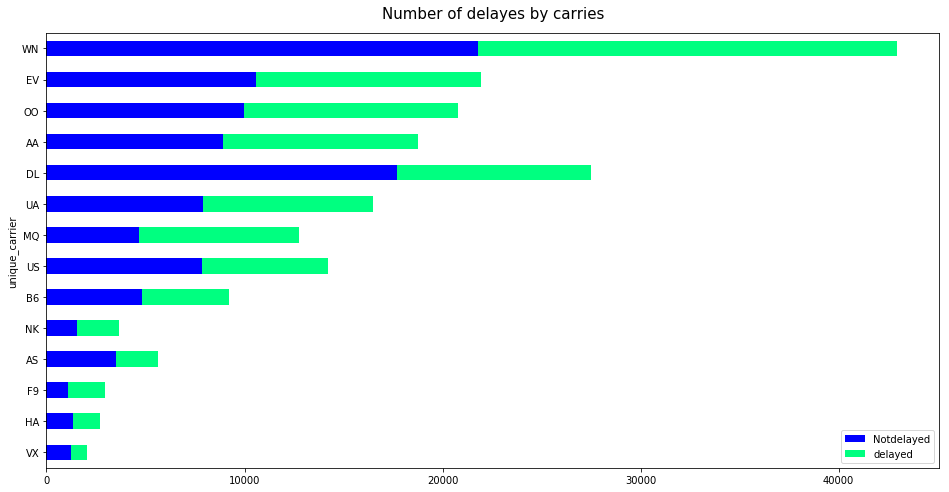

In [334]:
grouped_by_delay.sort_values(by='delayed',ascending=True).plot(kind='barh',stacked=True, figsize=[16,8], colormap='winter')
plt.title('Number of delayes by carries', fontsize=15, y=1.02)
plt.show()

In [335]:
# 2. Count the number of delays by carrier which are greater than 20 minutes
data['delayed_20']=data['arr_delay'].apply(lambda x: x>20)

### 2. The number of delayed flights each carrier flew on each day 

<li> [Pivot Table](http://pbpython.com/pandas-pivot-table-explained.html) it allows to summarize data as grouped by different values, including values in categorical columns.  
><li> `index`  like Rows in Excel   
><li> `columns`   
><li> **Which values are summarized by** `values` the name of the column of values to be aggregated in the ultimate table, then grouped by the Index and Columns and aggregated according to the Aggregation function   
><li> **How values are summarized by** `aggfunc=`, such as `sum`,`mean`,`count`    


In [336]:
flights_by_carrier=data.pivot_table(\
        index='flight_date', 
        columns='unique_carrier',
        values='flight_num', aggfunc='count')
flights_by_carrier.head(3)

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
2015-01-02,1545,477,759,2271,1824,254,224,1046,287,1763,1420,1177,176,3518
2015-01-03,1453,449,711,2031,1744,192,202,937,285,1681,1233,1028,160,3328
2015-01-04,1534,458,759,2258,1833,249,206,1027,284,1731,1283,1158,169,3403


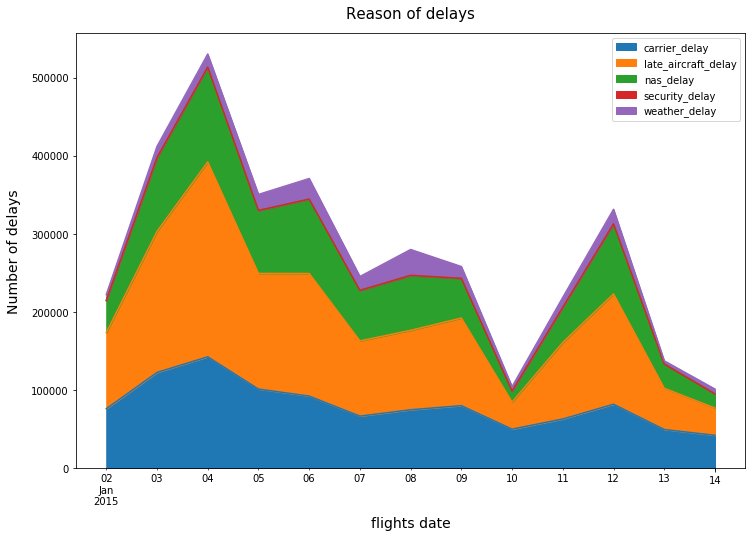

In [337]:
reasonable_delays=data.columns.tolist()[8:13]
data.pivot_table(index='flight_date',
values=reasonable_delays,aggfunc='sum').plot(kind='area', stacked=True, figsize=[12,8])
plt.title('Reason of delays', fontsize=15, y=1.02)
plt.xlabel('flights date', fontsize=14, labelpad=10)
plt.ylabel('Number of delays', fontsize=14, labelpad=10);

The late aircraft caused a large number of the delays on the 4th and the 12th of January. One hypothesis is that snow kept planes grounded and unable to continue their routes.   

### 3. Total minutes delay by carriers

In [338]:
pivot_delay=data.pivot_table(index='unique_carrier', columns='flight_date',\
values='arr_delay', aggfunc='sum')

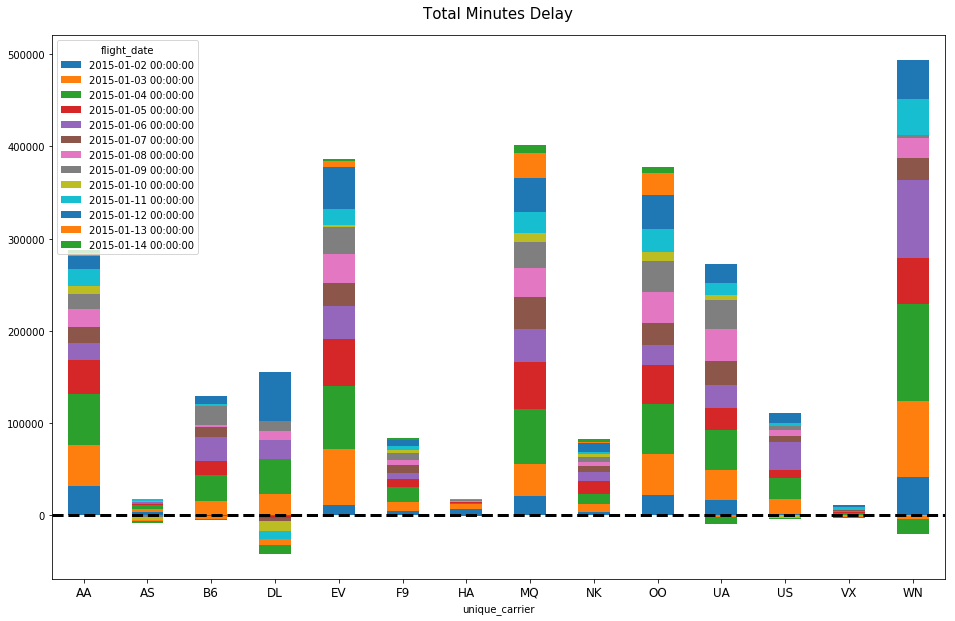

In [339]:
pivot_delay.plot(kind='bar', stacked=True, figsize=[16,10])
plt.axhline(y=0, linewidth=3,color='black',linestyle='--')
plt.title('Total Minutes Delay', fontsize=15, y=1.02)
plt.xticks(rotation=0.5, fontsize=12);

### 4. Closer look at The Southwest Airlines Co. flights

In [340]:
bin_values=[x*5  for x in range(-10,41)]

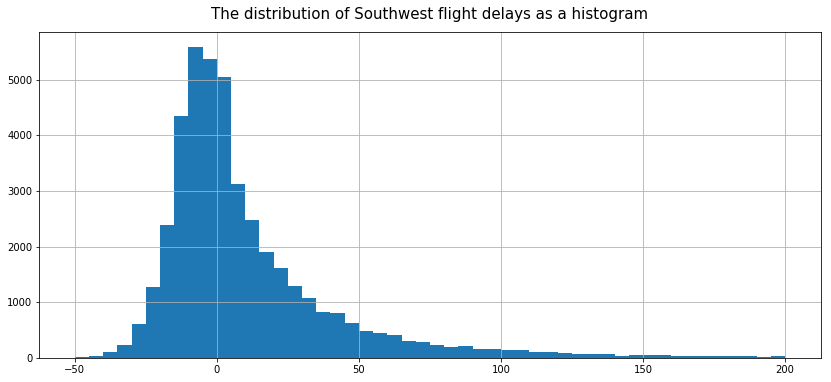

In [341]:
wn_carrier = data[data['unique_carrier'] == 'WN']
wn_carrier['arr_delay'].hist(bins=bin_values, figsize=[14,6],grid=True)
plt.title('The distribution of Southwest flight delays as a histogram',fontsize=15, y=1.02);

The vas majority of Southwest flights weren't more than 30 minues late. Though the airline has many flights, the majority of them aren't late enough. 

### 5. Comparing distributions with historgrams

unique_carrier
MQ    AxesSubplot(0.125,0.125;0.775x0.755)
US    AxesSubplot(0.125,0.125;0.775x0.755)
Name: arr_delay, dtype: object

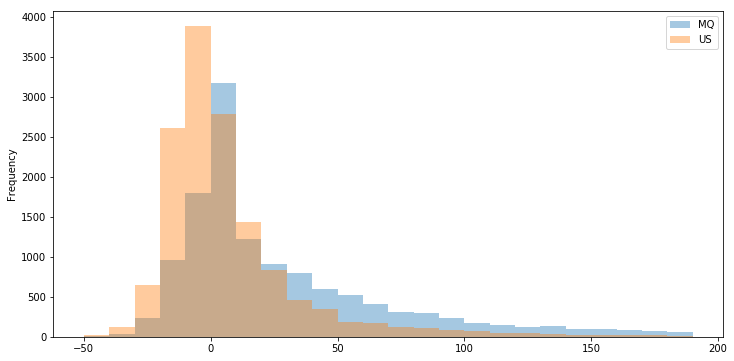

In [342]:
bin_values = np.arange(start=-50, stop=200, step=10)
us_mq_airlines_index = data['unique_carrier'].isin(['US','MQ']) # create index of flights from those airlines
us_mq_airlines = data[us_mq_airlines_index] # select rows
group_carriers = us_mq_airlines.groupby('unique_carrier')['arr_delay'] # group values by carrier, select minutes delayed
group_carriers.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True) # alpha for transparency

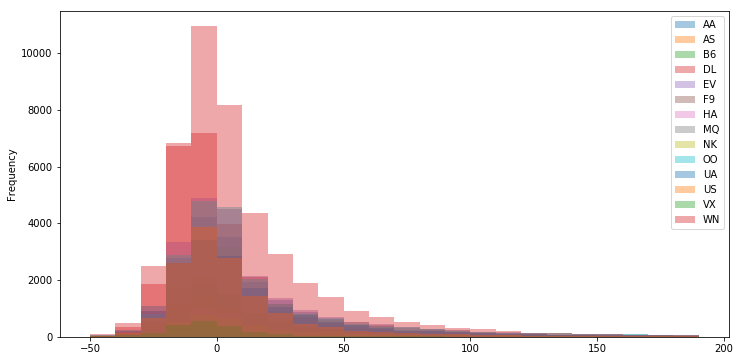

In [343]:
bin_values = np.arange(start=-50, stop=200, step=10)
# create index of flights from those airlines
group_carriers = data.groupby('unique_carrier')['arr_delay'] # group values by carrier, select minutes delayed
group_carriers.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True); # alpha for transparency;

By comparing all the carriers in one plot, we found it can barely tell the delay information of carrier.

### 6. Try interactively data visualization plot

In [413]:
#create a data_dict for storing the carrier's code and carriers arr_delay
data_dict={}
for i in range(len(data['unique_carrier'].unique())):
    carrier_key=data['unique_carrier'].unique()[i]
    carrier_value=data[data.unique_carrier==data['unique_carrier'].unique()[i]]['arr_delay'].apply(lambda x: min(x,400))
    data_dict[carrier_key]=carrier_value

In [414]:
data_dict.keys()

dict_keys(['AA', 'AS', 'B6', 'DL', 'VX', 'US', 'WN', 'UA', 'NK', 'MQ', 'OO', 'EV', 'HA', 'F9'])

#### a) Plotly 

In [417]:
traces=[]
for key,value in data_dict.items():
    trace=go.Histogram(
        name=key,
        x=value,
        opacity=0.45) 
    traces.append(trace)

In [418]:
import  plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

layout = go.Layout(barmode='overlay')
fig = go.Figure(data=traces, layout=layout)

py.iplot(fig, filename='overlaid histogram',world_readable=True)

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~yuexili/0 or inside your plot.ly account where it is named 'overlaid histogram'


#### b) Bokeh (unfinished)

In [ ]:
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure

from bokeh.models import CategoricalColorMapper, HoverTool, ColumnDataSource, Panel
from bokeh.models.widgets import CheckboxGroup, Slider, RangeSlider, Tabs

from bokeh.layouts import column, row, WidgetBox
from bokeh.palettes import Category20_16

from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application

output_notebook()